In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display
import IPython.display as ipd

from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from pathlib import Path

<h1>List Features</h1>

<h3>Time Domain<input type="checkbox"/></h3>
<ol>
<li>Amplitude-time representation <input type="checkbox"/></li>
<li>Average Energy<input type="checkbox"/></li>
<li>Zero Crossing Rate<input type="checkbox"/></li>
<li>Silence Ratio<input type="checkbox"/></li>
</ol>

<h3>Frequency Domain<input type="checkbox"/></h3>
<ol>
<li>Sound Spectrum Representation<input type="checkbox"/></li>
<li>Bandwidth<input type="checkbox"/></li>
<li>Spectral Centroid<input type="checkbox"/></li>
</ol>

<h3>MFCC<input type="checkbox"/></h3>
<p>Cepstral Coefficents<input type="checkbox"/></p>

<h3>Time-Frequency Domain<input type="checkbox"/></h3>
<ol>
<li>Spectogram Representation<input type="checkbox"/></li>
</ol>

#Pande dani

In [3]:
#TODO : Kelas B = (200 * (2-1)) + 1 = awal + No absen -- 10*(absen-1)+1

No_allowed = range(241,251)

In [4]:
PATH = Path().parent
DDIR = PATH / "dataset"
HAPPY = DDIR / "Happy"
NEUTRAL = DDIR / "Neutral"
SAD = DDIR / "Sad"

In [5]:
#TODO : Amplitude-time representation function
def audio_display_and_waveshow(audio_path):
    au_obj = ipd.Audio(audio_path)
    audio, sr = librosa.load(audio_path)
    
    sns.set()
    plt.figure(figsize=(10,6))
    librosa.display.waveshow(audio, alpha=0.7) #TODO: display the wave plot
    plt.title(str(audio_path).split("\\")[-1])
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.show()
    
    return au_obj

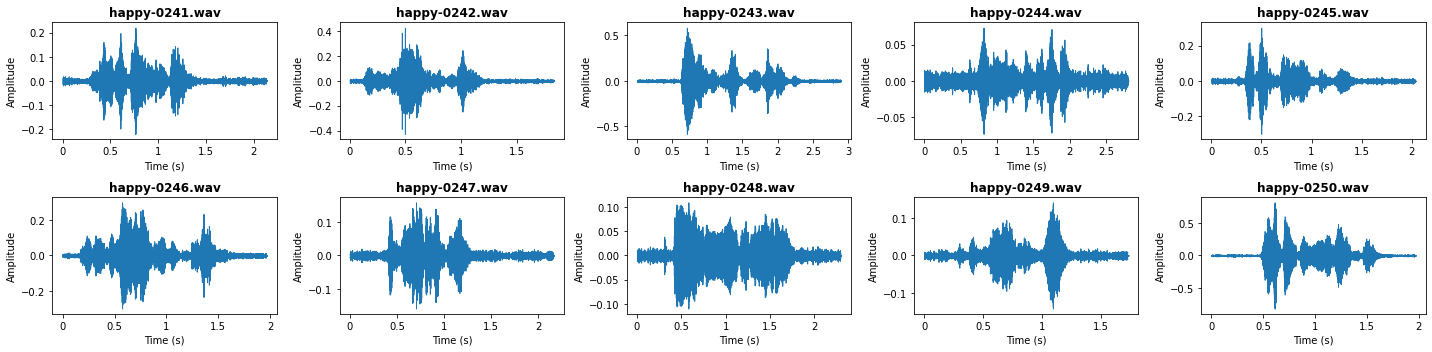

In [6]:
#TODO : Amlpitude-time representation

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,5))
for i,num in enumerate(No_allowed):
    path = f'{HAPPY}/happy-{num:04d}.wav'
    audio_obj = ipd.Audio(path)
    audio, sr = librosa.load(path)

    
    librosa.display.waveshow(audio, sr=sr, ax=ax[i//5,i%5])
    ax[i//5,i%5].set_title(str(path).split("/")[-1], weight='bold')
    ax[i//5,i%5].set_ylabel('Amplitude')
    ax[i//5,i%5].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

<h1>Amplitude-Time Representation <font color='green'>DONE</font></h1>

In [7]:
#TODO : Average Energy function

def Root_Mean_Square_Energy(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    rms_energy = librosa.feature.rms(signal, frame_length=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(rms_energy))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, rms_energy, color='r')
        plt.title(audio_path.split("/")[-1] + " Root Mean Square Energy")
        plt.show()
    
    return rms_energy

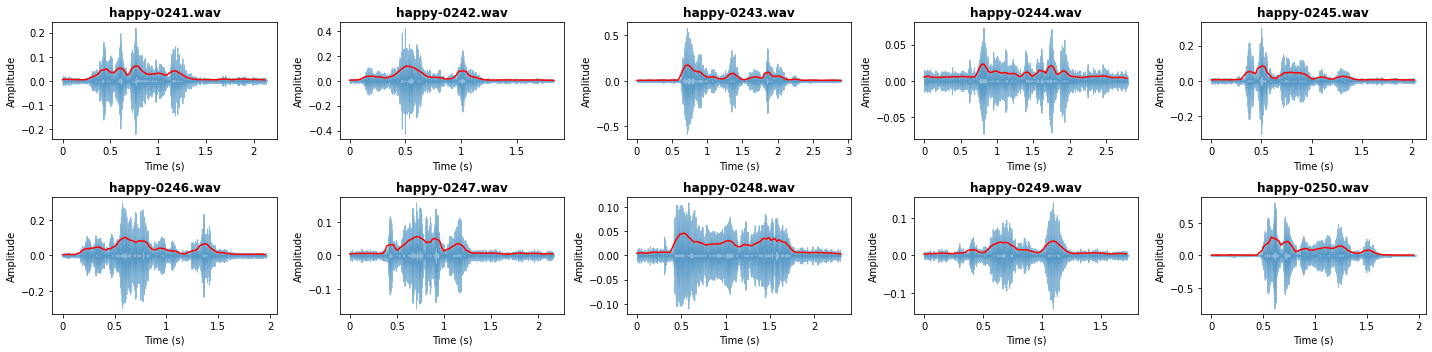

In [8]:
#TODO : Average Energy

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,5))
for i,num in enumerate(No_allowed):

    path = f'{HAPPY}/happy-{num:04d}.wav'
    audio, _ = librosa.load(path)
    rms_energy = librosa.feature.rms(y=audio, frame_length=2048, hop_length=512)[0] #2048 and 512 default
    
    frames = range(0, len(rms_energy))
    times = librosa.frames_to_time(frames, hop_length=512)

    librosa.display.waveshow(audio, ax=ax[i//5,i%5], alpha=0.5)
    ax[i//5,i%5].plot(times, rms_energy, color='r')
    ax[i//5,i%5].set_title(str(path).split("/")[-1], weight='bold')
    ax[i//5,i%5].set_ylabel('Amplitude')
    ax[i//5,i%5].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

<h1>Average Energy <font color='green'>DONE</font></h1>

In [9]:
#TODO : Zero Crossing Rate fucntion

def Zero_Crossing_Rate(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    zcr = librosa.feature.zero_crossing_rate(signal, frame_length=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(zcr))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, zcr, color='r')
        plt.title(audio_path.split("/")[-1] + " Zero Crossing Rate")
        plt.show()
    
    return zcr

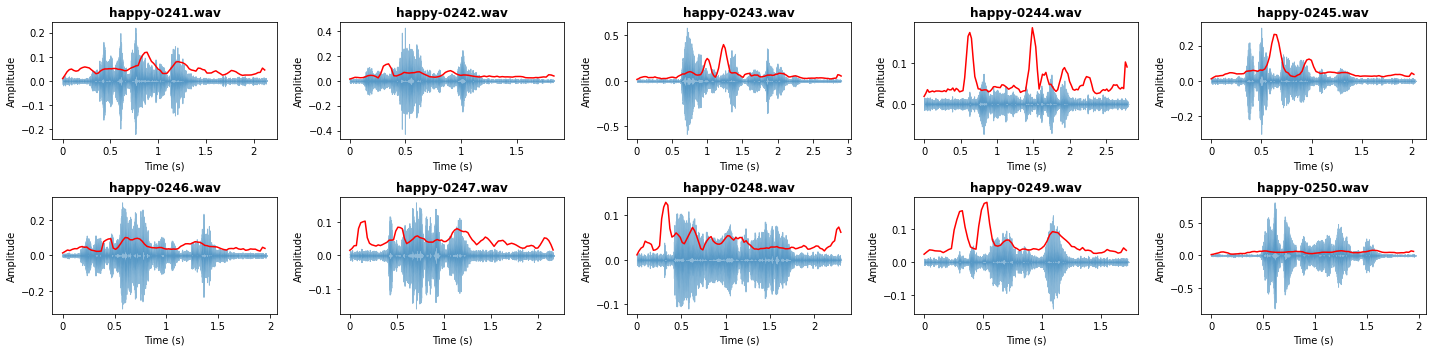

In [10]:
#TODO : Zero Crossing Rate

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,5))
for i,num in enumerate(No_allowed):
    
    path = f'{HAPPY}/happy-{num:04d}.wav'
    audio, _ = librosa.load(path)
    zcr = librosa.feature.zero_crossing_rate(y=audio, frame_length=2048, hop_length=512)[0] #2048 and 512 default

    frames = range(0, len(zcr))
    times = librosa.frames_to_time(frames, hop_length=512)

    librosa.display.waveshow(audio, ax=ax[i//5,i%5], alpha=0.5)
    ax[i//5,i%5].plot(times, zcr, color='r')
    ax[i//5,i%5].set_title(str(path).split("/")[-1], weight='bold')
    ax[i//5,i%5].set_ylabel('Amplitude')
    ax[i//5,i%5].set_xlabel('Time (s)')
    
plt.tight_layout()
plt.show()

<h1>Zero Crossing Rate <font color='green'>DONE</font></h1>

In [11]:
#TODO : Silence Ratio Function

def Silence_Ratio(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    rms_energy = librosa.feature.rms(signal, frame_length=frame_size, hop_length=hop_len)[0]
    zcr = librosa.feature.zero_crossing_rate(signal, frame_length=frame_size, hop_length=hop_len)[0]
    
    silence_ratio = np.sum(rms_energy < 0.02) / float(len(zcr))
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, rms_energy, color='r')
        plt.title(audio_path.split("/")[-1] + " Silence Ratio")
        plt.show()
    
    return silence_ratio

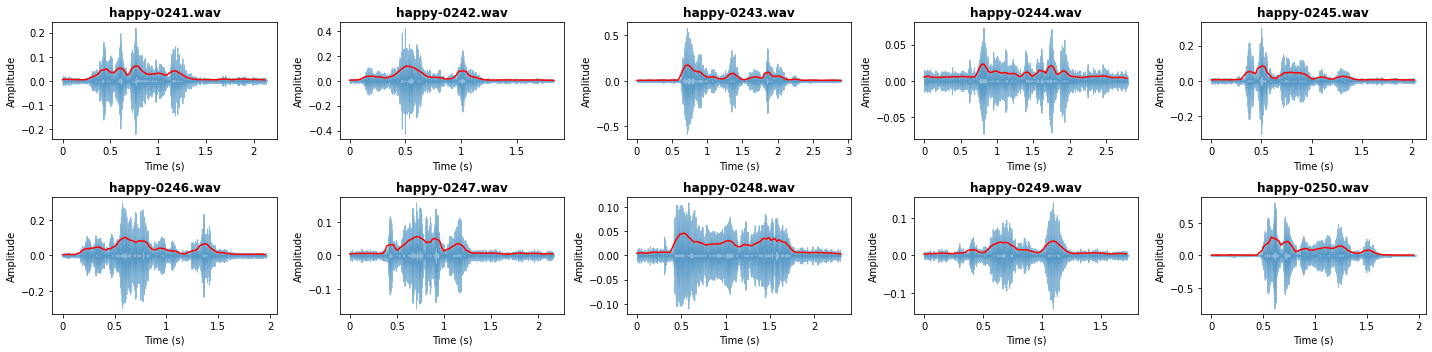

In [12]:
#TODO : Silence Ratio

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,5))
for i,num in enumerate(No_allowed):
        
    path = f'{HAPPY}/happy-{num:04d}.wav'
    audio, _ = librosa.load(path)
    rms_energy = librosa.feature.rms(y=audio, frame_length=2048, hop_length=512)[0] #2048 and 512 default
    zcr = librosa.feature.zero_crossing_rate(y=audio, frame_length=2048, hop_length=512)[0] #2048 and 512 default
    
    silence_ratio = np.sum(rms_energy < max(rms_energy)*0.25) / float(len(zcr)) # under the 25% of max energy considered to be Silence in this case.

    frames = range(0, len(rms_energy))
    times = librosa.frames_to_time(frames, hop_length=512)

    librosa.display.waveshow(audio, ax=ax[i//5,i%5], alpha=0.5)
    ax[i//5,i%5].plot(times, rms_energy, color='r')
    ax[i//5,i%5].set_title(str(path).split("/")[-1], weight='bold')
    ax[i//5,i%5].set_ylabel('Amplitude')
    ax[i//5,i%5].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

<h1>Silence Ratio <font color='green'>DONE</font></h1>

In [13]:
#TODO : Sound Spectrum Function

def Sound_Spectrum(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    stft = librosa.stft(signal, n_fft=frame_size, hop_length=hop_len)
    mag_spec = np.abs(stft)
    
    frames = range(0, mag_spec.shape[1])
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.specshow(mag_spec, sr=sr, hop_length=hop_len, x_axis='time', y_axis='linear')
        plt.title(audio_path.split("/")[-1] + " Sound Spectrum")
        plt.show()
    
    return mag_spec

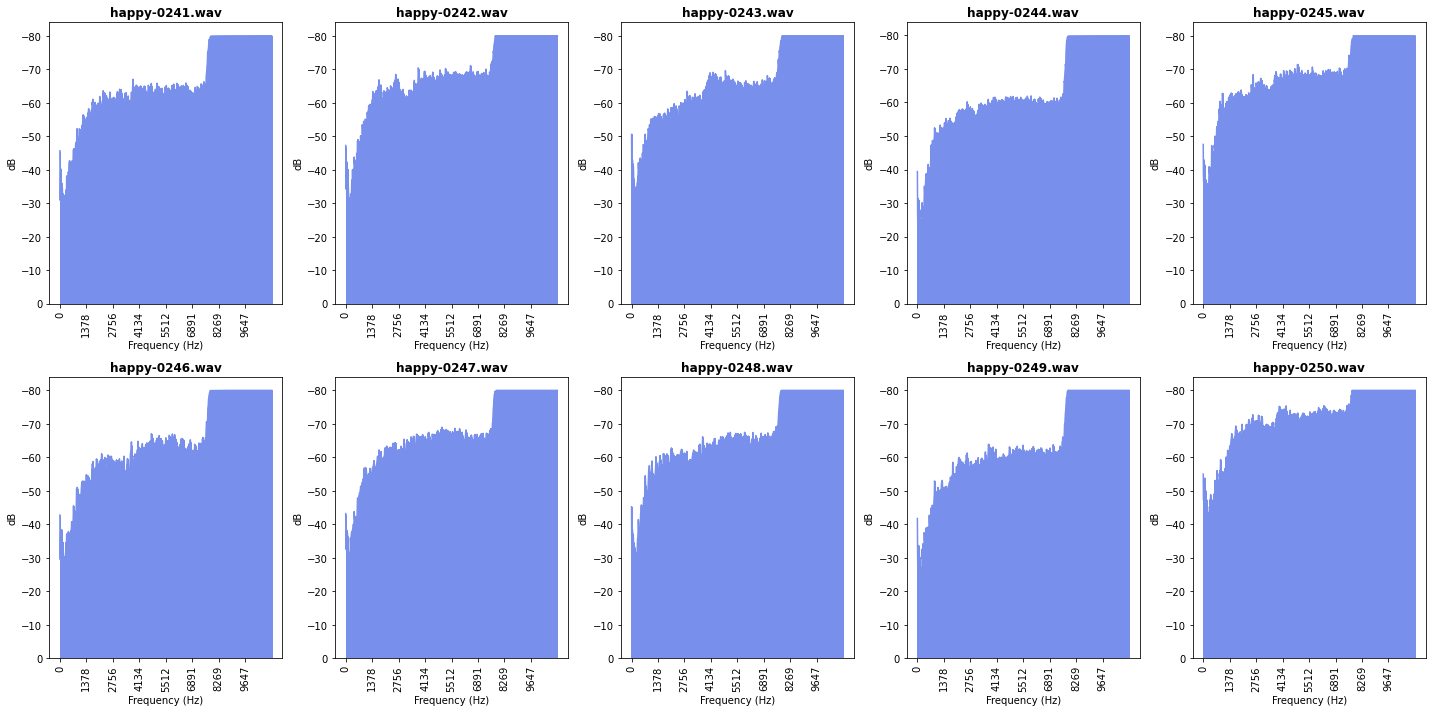

In [19]:
#TODO : Sound Spectrum

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,10))
for i,num in enumerate(No_allowed):
    
    path=f'{HAPPY}/happy-{num:04d}.wav'
    # load the file
    audio, _ = librosa.load(path) #default 44100
    # short time fourier transform
    # (n_fft and hop length determine frequency/time resolution)
    Stft_value = librosa.stft(y=audio, n_fft=2048, hop_length=2048//2)
    # convert to db
    # (for your CNN you might want to skip this and rather ensure zero mean and unit variance)
    Db_value = librosa.amplitude_to_db(np.abs(Stft_value), ref=np.max)
    # average over file
    D_AVG = np.mean(Db_value, axis=1)

    ax[i//5,i%5].bar(x=np.arange(D_AVG.shape[0]), height=D_AVG, edgecolor='#788feb')
    # ax[i//5,i%5].plot(D_AVG, color='#788feb')
    x_ticks_positions = [n for n in range(0, 2048 // 2, 2048 // 16)]
    x_ticks_labels = [str(int(round(sr / 2048 * n,0))) for n in x_ticks_positions]
    ax[i//5,i%5].set_xticks(x_ticks_positions, x_ticks_labels, rotation=90)
    ax[i//5,i%5].set_xlabel('Frequency (Hz)')
    ax[i//5,i%5].set_ylabel('dB')
    ax[i//5,i%5].invert_yaxis()
    ax[i//5,i%5].set_title(str(path).split("/")[-1], weight='bold')

plt.tight_layout()
plt.show()

<h1>Sound Spectrum Representation <font color='green'>DONE</font></h1>

In [20]:
#TODO : Bandwidth Function

def Bandwidth(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    bandwidth = librosa.feature.spectral_bandwidth(signal, sr=sr, n_fft=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(bandwidth))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, bandwidth, color='r')
        plt.title(audio_path.split("/")[-1] + " Bandwidth")
        plt.show()
    
    return bandwidth

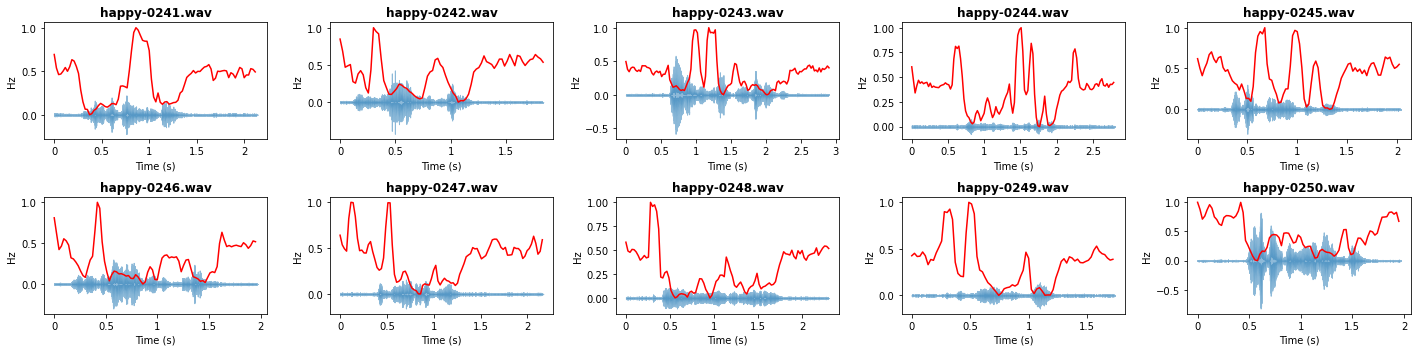

In [30]:
#TODO : Bandwidth

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,5))
for i,num in enumerate(No_allowed):
    path = f'{HAPPY}/happy-{num:04d}.wav'
    audio, _ = librosa.load(path)
    bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr, n_fft=2048, hop_length=512)[0] #2048 and 512 default

    frames = range(0, len(bandwidth))
    times = librosa.frames_to_time(frames, hop_length=512)

    librosa.display.waveshow(audio, ax=ax[i//5,i%5], alpha=0.5)
    ax[i//5,i%5].plot(times, minmax_scale(bandwidth, axis=0), color='r')
    ax[i//5,i%5].set_title(str(path).split("/")[-1], weight='bold')
    ax[i//5,i%5].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

<h1>Bandwidth <font color='green'>DONE</font></h1>

In [24]:
#TODO : Spectral Centroid Function

def Spectral_Centroid(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    centroid = librosa.feature.spectral_centroid(signal, sr=sr, n_fft=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(centroid))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, centroid, color='r')
        plt.title(audio_path.split("/")[-1] + " Spectral Centroid")
        plt.show()
    
    return centroid

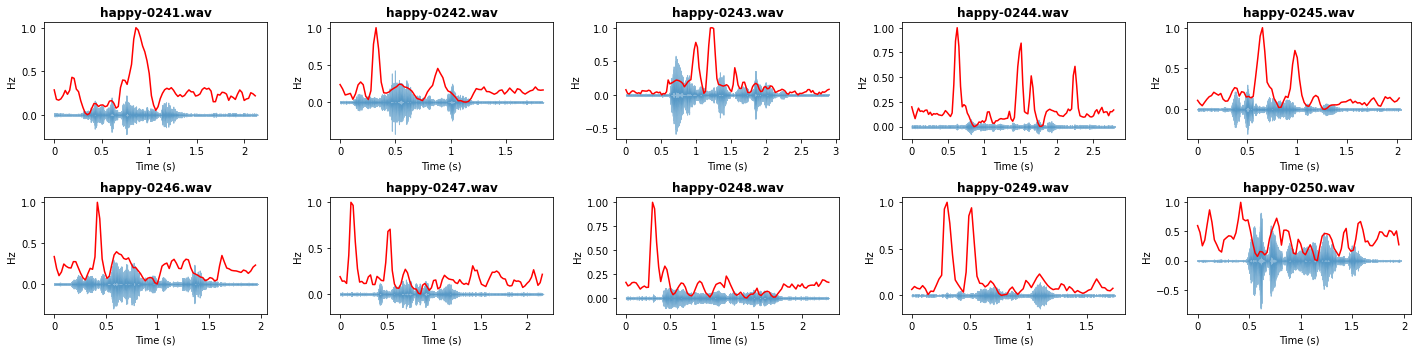

In [29]:
#TODO : Spectral Centroid

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,5))
for i,num in enumerate(No_allowed):
    path = f'{HAPPY}/happy-{num:04d}.wav'
    audio, _ = librosa.load(path)
    centroid = librosa.feature.spectral_centroid(y=audio, sr=sr, n_fft=2048, hop_length=512)[0] #2048 and 512 default

    frames = range(0, len(centroid))
    times = librosa.frames_to_time(frames, hop_length=512)

    librosa.display.waveshow(audio, ax=ax[i//5,i%5], alpha=0.5)
    ax[i//5,i%5].plot(times, minmax_scale(centroid,axis=0) , color='r')

    ax[i//5,i%5].set_title(str(path).split("/")[-1], weight='bold')
    ax[i//5,i%5].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

<h1>Spectral Centroid <font color='green'>DONE</font></h1>

In [31]:
#TODO : Spectral Rolloff Function

def Spectral_Rolloff(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    rolloff = librosa.feature.spectral_rolloff(signal, sr=sr, n_fft=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(rolloff))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, rolloff, color='r')
        plt.title(audio_path.split("/")[-1] + " Spectral Rolloff")
        plt.show()
    
    return rolloff

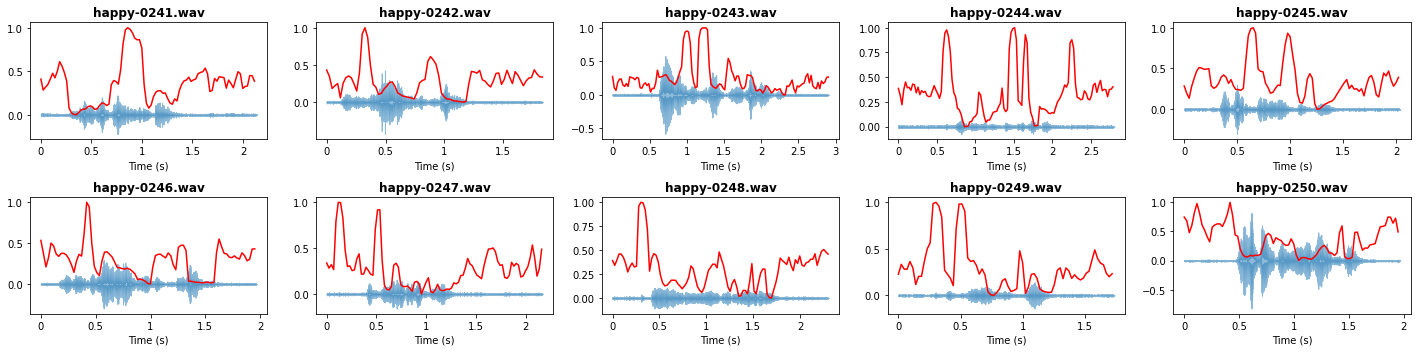

In [32]:
#TODO : Spectral Rolloff

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,5))
for i,num in enumerate(No_allowed):
    path = f'{HAPPY}/happy-{num:04d}.wav'
    audio, _ = librosa.load(path)
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr, n_fft=2048, hop_length=512)[0] #2048 and 512 default

    frames = range(0, len(rolloff))
    times = librosa.frames_to_time(frames, hop_length=512)

    librosa.display.waveshow(audio, ax=ax[i//5,i%5], alpha=0.5)
    ax[i//5,i%5].plot(times, minmax_scale(rolloff,axis=0) , color='r')

    ax[i//5,i%5].set_title(str(path).split("/")[-1], weight='bold')
    ax[i//5,i%5].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

<h1>Spectral Rolloff <font color='green'>DONE</font></h1>

In [33]:
#TODO : Mel-Frequency Cepstral Coefficients Function

def MFCC(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(signal, sr=sr, n_fft=frame_size, hop_length=hop_len, n_mfcc=13)
    
    frames = range(0, len(mfcc))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, mfcc.T, color='r')
        plt.title(audio_path.split("/")[-1] + " MFCC")
        plt.show()
    
    return mfcc

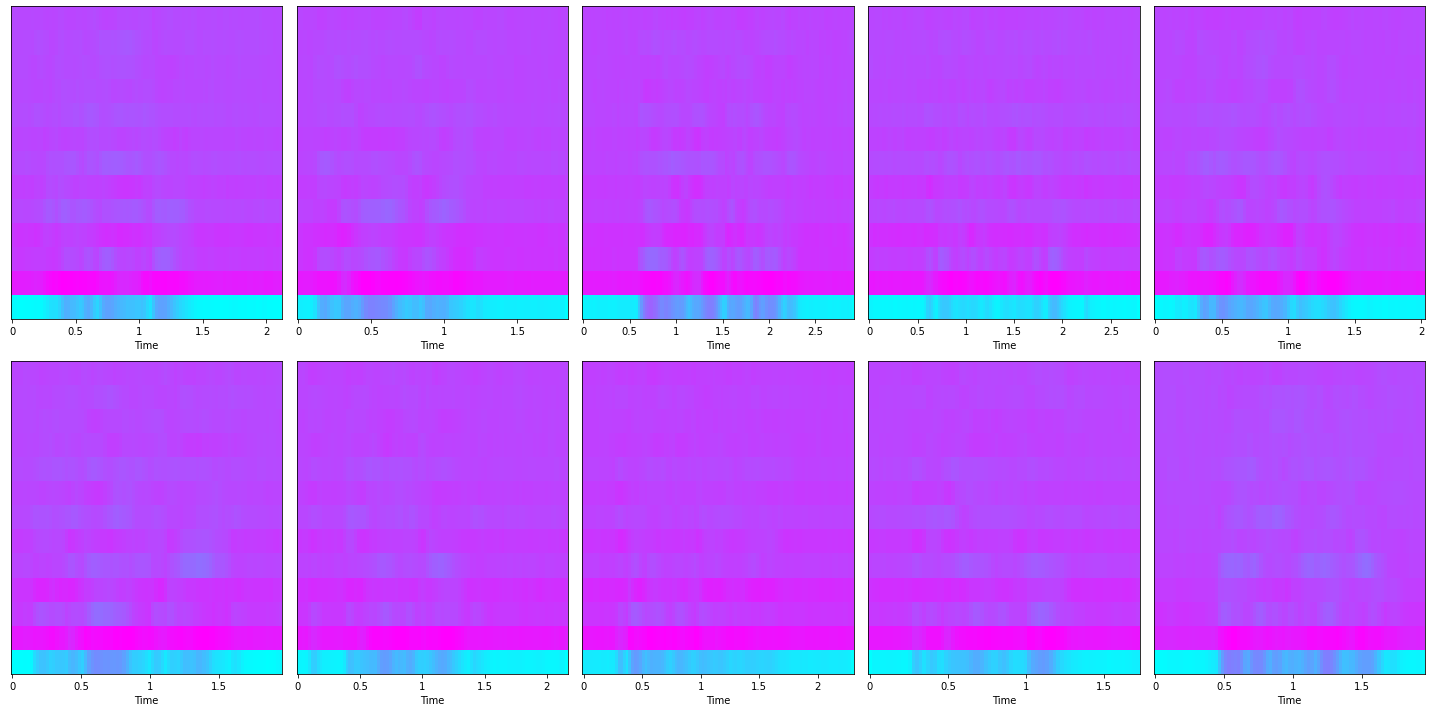

In [38]:
#TODO : Mel-Frequency Cepstral Coefficients

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,10))
for i,num in enumerate(No_allowed):
    path = f'{HAPPY}/happy-{num:04d}.wav'
    audio, _ = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_fft=2048, hop_length=512, n_mfcc=13) #2048 and 512 default

    librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap='cool', ax=ax[i//5,i%5])
plt.tight_layout()
plt.show()

c:\Users\Windows\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\Windows\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
c:\Users\Windows\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\Windows\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:254

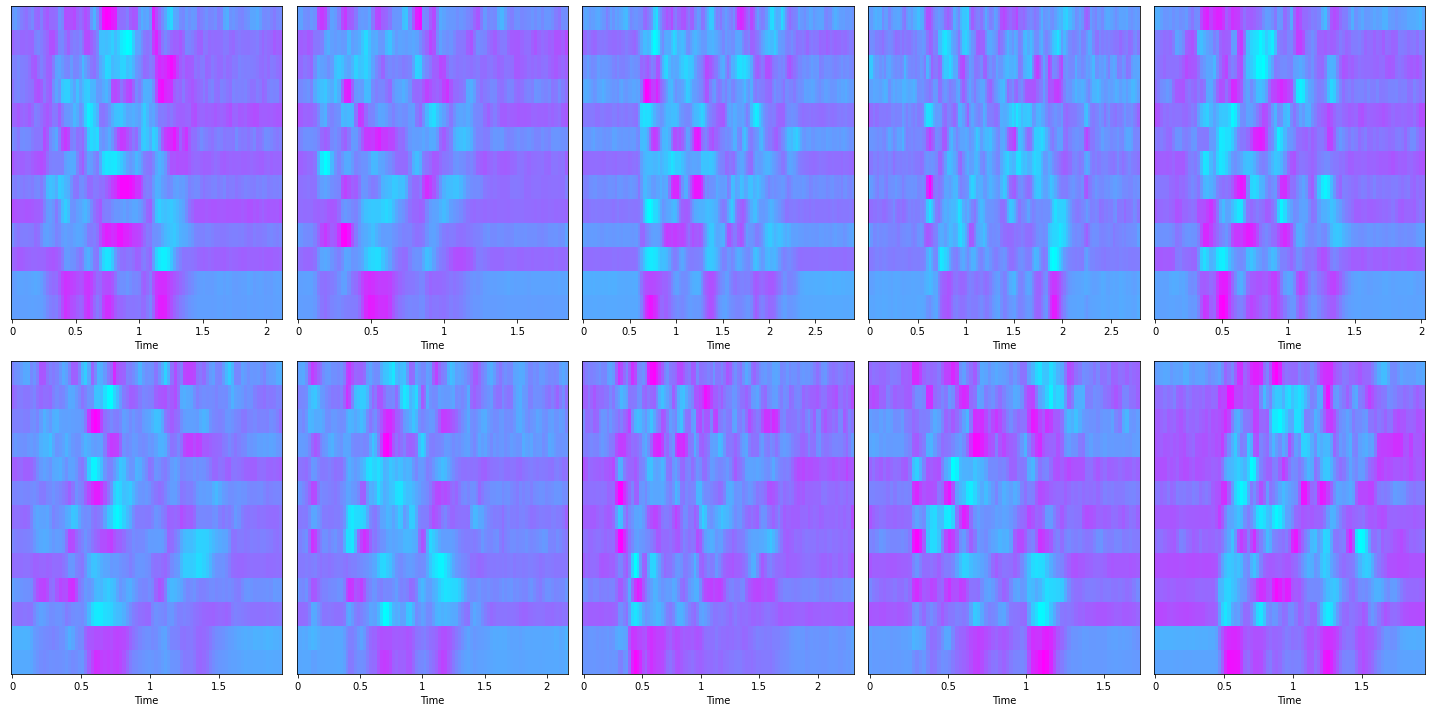

In [51]:
#TODO : Scaled MFCC

scaler = StandardScaler()

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,10))
for i,num in enumerate(No_allowed):
    path = f'{HAPPY}/happy-{num:04d}.wav'
    audio, _ = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_fft=2048, hop_length=512, n_mfcc=13) #2048 and 512 default

    librosa.display.specshow(scale(scaler.fit_transform(mfcc),axis=1), sr=sr, x_axis='time', cmap='cool', ax=ax[i//5,i%5])
plt.tight_layout()
plt.show()

#### Last Checkpoint
#TODO : Next Project MFCC